# Plotting lattice quantities
The chip lab uses (used) a 760.6nm blue-detuned lattice for the potassium-40 degenerate Fermi gas.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.lattice import Lattice
from amo.constants import h, mK, hbar, a_0

from general.plot_settings import paper_settings
plt.rcParams.update(paper_settings)

## Plot band energies

In [2]:
s = 40  # In recoil energy
Lat = Lattice(s)

print(f"The recoil energy is {Lat.ER/h/1e3:.2f} kHz")

The recoil energy is 8.63 kHz


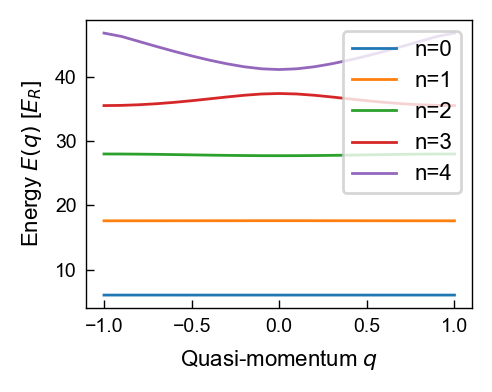

In [3]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Quasi-momentum $q$'
ylabel = r'Energy $E(q)$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

q_max = 1
q_num = 21
q = np.linspace(-q_max, q_max, q_num)

band_structure = np.zeros((Lat.N, q_num), dtype=float)

band_structure = np.array([Lat.calculate_En(qi) for qi in q])
band_structure = band_structure.T

n = 0
while n < 5:
    ax.plot(q, band_structure[n], label=f"n={n}")
    n += 1

ax.legend()

fig.tight_layout()
plt.show()

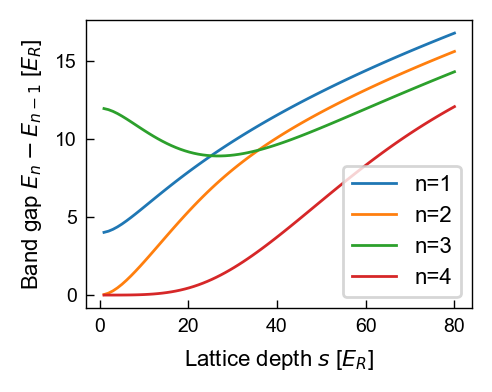

In [4]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Band gap $E_n - E_{n-1}$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_max = 80
depths = np.linspace(1, s_max, s_max-1)

bands = [1, 2, 3, 4]
band_gaps = np.array([[Lattice(s).band_gap(n-1, n) \
                       for s in depths] for n in bands]) 

for n in bands:
    ax.plot(depths, band_gaps[n-1], label=f"n={n}")
ax.legend()

fig.tight_layout()
plt.show()

### Plot E_1 - E_0 compared to E_2 - E_0

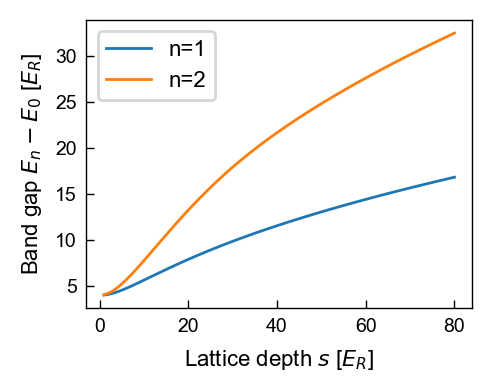

In [5]:
fig, ax = plt.subplots(figsize=(2.5,2))

xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Band gap $E_n - E_0$ [$E_R$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_max = 80
depths = np.linspace(1, s_max, s_max-1)

bands = [1, 2]
band_gaps = np.array([[Lattice(s).band_gap(0, n) \
                       for s in depths] for n in bands]) 

for n in bands:
    ax.plot(depths, band_gaps[n-1], label=f"n={n}")
ax.legend()

fig.tight_layout()
plt.show()

In [6]:
print(band_gaps[1] * Lat.ER/h/1e3)
print(depths)

[ 35.00953063  36.46433588  38.76943207  41.77583391  45.3332641
  49.30960463  53.59704599  58.11077625  62.78493926  67.56832704
  72.42073031  77.31012942  82.21063252  87.1010007   91.96360969
  96.78372706 101.54901326 106.2491781  110.87574219 115.42186525
 119.88221355 124.25284604 128.5311055  132.71550625 136.80561465
 140.8019221  144.70571289 148.51893051 152.24404694 155.88393882
 159.44177398 162.92091075 166.32481117 169.65696865 172.92084942
 176.11984684 179.25724706 182.33620463 185.35972621 188.33066109
 191.25169695 194.12535973 196.95401659 199.73988106 202.48501966
 205.19135953 207.86069659 210.49470393 213.0949401  215.66285734
 218.19980936 220.70705886 223.18578452 225.63708756 228.0619979
 230.46147977 232.83643695 235.18771755 237.51611844 239.82238925
 242.10723607 244.37132483 246.61528437 248.83970927 251.04516238
 253.23217722 255.40126007 257.55289196 259.68753044 261.80561124
 263.90754974 265.99374236 268.06456782 270.12038826 272.16155035
 274.1883862

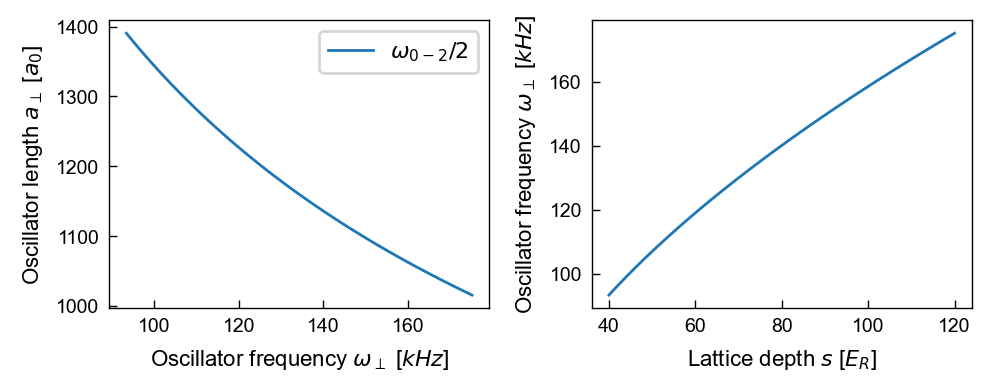

In [36]:
from amo.quantum_gas import oscillator_length
fig, axs = plt.subplots(1, 2, figsize=(5,2))

ax = axs[0]
xlabel = r'Oscillator frequency $\omega_\perp$ [$kHz$]'
ylabel = r'Oscillator length $a_\perp$ [$a_0$]'
ax.set(xlabel=xlabel, ylabel=ylabel)

s_min, s_max = 40, 120
depths = np.linspace(s_min, s_max, s_max-s_min-1)

# bands = [1, 2, 3, 4]
n = 2
Lats = np.array([Lattice(s) for s in depths])
omega_perps = np.array([Lat.band_gap(n-2, n)*Lat.ER/hbar/2 \
                       for Lat in Lats])
a_perps = oscillator_length(omega_perps/2)/a_0

ax.plot(omega_perps/1e3/2/np.pi, a_perps, label=r"$\omega_{0-2}/2$")
ax.legend()

ax = axs[1]
xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'Oscillator frequency $\omega_\perp$ [$kHz$]'
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.plot(depths, omega_perps/1e3/2/np.pi)

fig.tight_layout()
plt.show()

In [43]:
EF = 22e3  # Hz
kF = np.sqrt(2 * mK * EF*h)/hbar
1/kF / a_0

np.float64(1432.7211086941302)

In [48]:
65 / (2.7*1e-9/a_0)

1.2739451364948147

## Lattice deconfinement
In 2023-02 we measured trap frequencies while LAT 1 and 2 were on, for various lattice light intensities. This ultimately helped us realize LAT2 was not reaching the depth we expected (as it was deconfining more than we expected for the given lattice depth). 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.lattice import Lattice
from amo.constants import h, mK, hbar

from general.plot_settings import paper_settings, generate_plt_styles, colors
plt.rcParams.update(paper_settings)
colors = colors[0:]
colors = ['blue', 'red']
styles = generate_plt_styles(colors=colors)
plt.rcParams['lines.markersize'] = 5
plt.rcParams['legend.fontsize'] = 7

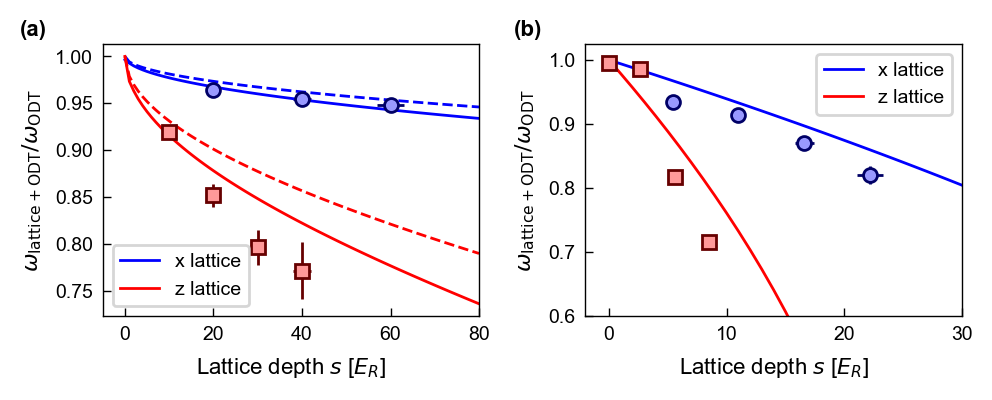

In [ ]:
from data.lattice.lattice_deconfinement_calculations import deconfinement_data

# Lattice 1 trap frequency 
wz = 440  # Trap freq with no lattice
lat1_trap_freq_meas = {
        'forward': [np.array([5.41, 11.01, 16.62, 22.22]),
                    np.array([411, 402, 383, 361]),
                    np.array([4, 4, 4, 6])],
        'retro':   [np.array([20, 40, 60]),
                    np.array([424, 420, 417]),
                    np.array([3, 3, 3])]
}

lat1_trap_freq_calc = (deconfinement_data['depths'], 
                       deconfinement_data['LAT1_retro_wz'], 
                       deconfinement_data['LAT1_retro_wz_equal'])


# Lattice 2 trap frequency measurements|
wx = 162  # trap freq with no lattice
lat2_trap_freq_meas = {
        'forward': [np.array([0, 2.674, 5.59, 8.51]),
                    np.array([161.2, 159.8, 132.4, 115.9]),
                    np.array([0.5, 0.5, 0.5, 0.5])],
        'retro':   [np.array([40, 20, 10, 30]),
                    np.array([125, 138, 149, 129]),
                    np.array([5, 2, 1, 3])]
}

lat2_trap_freq_calc = (deconfinement_data['depths'], 
                       deconfinement_data['LAT2_retro_wx'], 
                       deconfinement_data['LAT2_retro_wx_equal'])

fig, axs = plt.subplots(1, 2, figsize=(5,2))

# Retro
ax = axs[0]
xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'$\omega_\mathrm{lattice + ODT}/\omega_\mathrm{ODT}$'
ax.set(xlabel=xlabel, ylabel=ylabel, xlim=[-5, 80])

i = 0
sty, color = (styles[i], colors[i])
s, f, ef = lat1_trap_freq_meas['retro']
ax.errorbar(s, f/wz, ef/wz, xerr=s/20, **sty, label='')
s, f, f_equal = lat1_trap_freq_calc
ax.plot(s, f/wz, color=color, label='x lattice')
ax.plot(s, f_equal/wz, '--', color=color)

i = 1
sty, color = (styles[i], colors[i])
s, f, ef = lat2_trap_freq_meas['retro']
ax.errorbar(s, f/wx, ef/wx, xerr=s/20, **sty, label='')
s, f, f_equal = lat2_trap_freq_calc
ax.plot(s, f/wx, color=color, label='z lattice')
ax.plot(s, f_equal/wx, '--', color=color)
ax.legend(loc='lower left')

# Forward
ax = axs[1]
xlabel = r'Lattice depth $s$ [$E_R$]'
ylabel = r'$\omega_\mathrm{lattice + ODT}/\omega_\mathrm{ODT}$'
ax.set(xlabel=xlabel, ylabel=ylabel, ylim=[0.6, 1.025], xlim=[-2, 30])

i = 0
sty, color = (styles[i], colors[i])
s, f, ef = lat1_trap_freq_meas['forward']
ax.errorbar(s, f/wz, ef/wz, xerr=s/20, **sty, label='')
s, f = (deconfinement_data['depths'], deconfinement_data['LAT1_forward_wz'])
ax.plot(s, f/wz, color=color, label='x lattice')

i = 1
sty, color = (styles[i], colors[i])
s, f, ef = lat2_trap_freq_meas['forward']
ax.errorbar(s, f/wx, ef/wx, xerr=s/20, **sty, label='')
s, f = (deconfinement_data['depths'], deconfinement_data['LAT2_forward_wx'])
ax.plot(s, f/wx, color=color, label='z lattice')
ax.legend()

fig.tight_layout()

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.22, -0.19]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.03, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.savefig("outputs/lattice_deconfinement_measurements.pdf")

plt.show()

## AM and FM spectroscopy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os

from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from amo.lattice import Lattice
from amo.constants import h, mK, hbar

import pandas as pd
from general.dat_helper import group_by_mean
from glob import glob

print(os.getcwd())

from general.plot_settings import paper_settings, generate_plt_styles, colors
plt.rcParams.update(paper_settings)
colors = colors[0:]
colors = ['blue', 'red']
styles = generate_plt_styles(colors=colors)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 7

f:\GitHub\ChiPyLab\examples


In [ ]:
files = ["2022-08-18_C_LAT1_AM.dat"]

data_folder = os.path.join("..", "data", "lattice")
file_suffix = 'LAT1_AM.dat'
files = glob(os.path.join(data_folder, '*' + file_suffix))

dfs = []
for file in files:
    dfs.append(pd.read_table(file, delimiter=',')) # making dataframe of chosen data

print(dfs[0].columns)

Index(['cyc', 'freq', 'cyc.1', 'ROIsum', 'fBg', 'fA1', 'fWidth1', 'fCtr1',
       'fA2', 'fWidth2', 'fCtr2', 'box1', 'box2', 'box3', 'box4', 'box5',
       'box6', 'box7', 'box8', 'box9', 'Nfit', 'BZ-2', 'BZ-1', 'BZ0', 'BZ1',
       'BZ2', 'sumBZ1', 'sumBZ2', 'fractionBZ0', 'fractionBZ1', 'fractionBZ2',
       'Excited', 'c5', 'c7', 'c9', 'fraction95', 'fraction75', 'fraction97',
       'sum95'],
      dtype='object')


In [6]:
for df, file in zip(dfs, files):
    print(file, len(df))

..\data\lattice\2022-08-02_M_LAT1_AM.dat 28
..\data\lattice\2022-08-18_C_LAT1_AM.dat 87
..\data\lattice\2022-08-30_D_LAT1_AM.dat 44
..\data\lattice\2022-09-13_B_LAT1_AM.dat 32
..\data\lattice\2022-09-16_B_LAT1_AM.dat 31
..\data\lattice\2022-09-17_B_LAT1_AM.dat 20


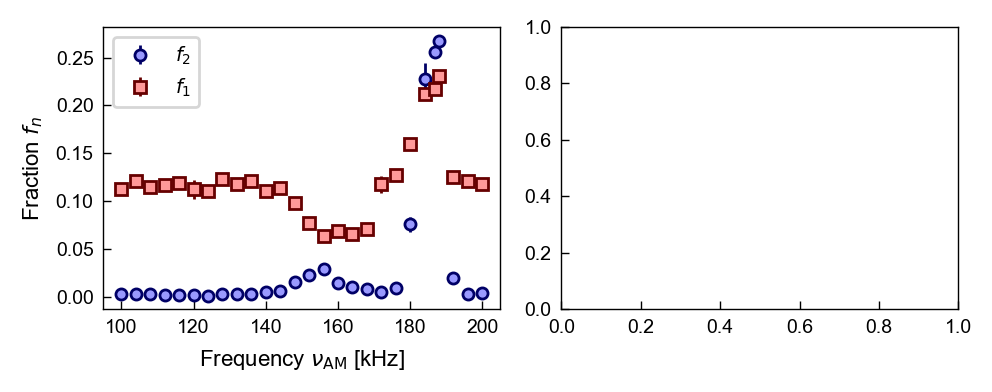

In [12]:
from scipy.optimize import curve_fit 


def lineshape(f, fmax, A):
    y = np.zeros_like(f)
    mask = f > fmax
    y[mask] = A * f[mask]/fmax**2 *np.sqrt(2*np.log(fmax/f[mask]))
    y[~mask] = 0 * f[~mask]
    return y


df_i = dfs[1]
scan_name = 'freq'
df = group_by_mean(df_i, 'freq')

fig, axs = plt.subplots(1, 2, figsize=(5,2))

# AM spec
ax = axs[0]
xlabel = r'Frequency $\nu_\mathrm{AM}$ [kHz]'
ylabel = r'Fraction $f_n$'
ax.set(xlabel=xlabel, ylabel=ylabel)

x = df[scan_name]

# N_2
i = 0
y_name = 'fractionBZ2'
sty, color = (styles[i], colors[i])
y = df[y_name]
ey = df['em_' + y_name]
ax.errorbar(x, y, ey, **sty, label=r'$f_2$')

# N_1
i = 1
y_name = 'fractionBZ1'
sty, color = (styles[i], colors[i])
y = df[y_name]
ey = df['em_' + y_name]
ax.errorbar(x, y, ey, **sty, label=r'$f_1$')

ax.legend()

fig.tight_layout()
# fig.savefig("outputs/LAT1_AM_spectroscopy.pdf")
plt.show()

In [50]:
x
xmax = 180

# print(np.log(xmax/x))
print(1/x*np.sqrt(2*np.log(xmax/x)))

0     0.010842
1     0.010072
2     0.009359
3     0.008698
4     0.008081
5     0.007504
6     0.006962
7     0.006451
8     0.005967
9     0.005505
10    0.005064
11    0.004639
12    0.004228
13    0.003826
14    0.003429
15    0.003033
16    0.002631
17    0.002211
18    0.001753
19    0.001205
20    0.000000
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
Name: freq, dtype: float64


In [42]:
lineshape(x, 180, 0.2)

f:\GitHub\ChiPyLab\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
f:\GitHub\ChiPyLab\.venv\Lib\site-packages\pandas\core\series.py:1033: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


array([                   0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808])